Presupunem ca ne dorim sa modelm pretul apartamentelor dintr-un anumit oras. Avem acces doar la un subset de 10 valori, exprimate in mii de euro:

x=[82, 106, 120, 68, 83, 89, 130, 92, 99, 89]

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
x= [82, 106, 120, 68, 83, 89, 130, 92, 99, 89]

**1.** Consideram valori cunoscute pentru medie si dispersie. Afisati distributia normala.

  miu=90
  sigma=10


In [ ]:
miu=90
sigma=10
dn=stats.norm.pdf(x,miu,sigma)
print(dn)

[2.89691553e-02 1.10920835e-02 4.43184841e-04 3.54745928e-03
 3.12253933e-02 3.96952547e-02 1.33830226e-05 3.91042694e-02
 2.66085250e-02 3.96952547e-02]


**2.** Calculati verosimilitatea de  obtine valorea x1=82 din distributia normala de mai sus.

In [ ]:
pi=np.pi
x1=82
veros_manual=(1/np.sqrt(2*pi*(sigma**2)))*np.exp(-(((x1-miu)**2)/(2*sigma**2)))
print(f"Probabilitatea calculata manual: {veros_manual}")
veros_scipy=stats.norm.pdf(x1, miu, sigma)
print(f"Probabilitatea utilizand scipy.stats.norm.pdf: {veros_scipy}")

Probabilitatea calculata manual: 0.028969155276148274
Probabilitatea utilizand scipy.stats.norm.pdf: 0.028969155276148274


**3.** Utilizati functia de mai sus pentru a calcula verosimilitatea tuturor datelor x

In [ ]:
veros_x = [stats.norm.pdf(value, miu, sigma) for value in x]

for veros_xi, xi in zip(x, veros_x):
    print(f"Verosimilitatea pentru x={veros_xi}: {xi}")

Verosimilitatea pentru x=82: 0.028969155276148274
Verosimilitatea pentru x=106: 0.011092083467945555
Verosimilitatea pentru x=120: 0.00044318484119380076
Verosimilitatea pentru x=68: 0.0035474592846231425
Verosimilitatea pentru x=83: 0.03122539333667613
Verosimilitatea pentru x=89: 0.03969525474770118
Verosimilitatea pentru x=130: 1.3383022576488537e-05
Verosimilitatea pentru x=92: 0.03910426939754559
Verosimilitatea pentru x=99: 0.02660852498987548
Verosimilitatea pentru x=89: 0.03969525474770118


**4.** Presupuneti o distributie normala pentru probabilitatea de a cunoaste media a priori: in intreaga tara preturile sunt distribuite normal si au o valoare medie de 100 si o dispersie de 50. De asemene, presupuneti si o probabilitate a priori pentru dispersie astfel incat acesta sa fie uniform distribuit in intervalul [1,70].

In [ ]:
miu_mean=100
miu_std=50

sigma_min=1
sigma_max=70

num_samples=1000

miu_samples=np.random.normal(miu_mean, miu_std, num_samples)
sigma_samples=np.random.uniform(sigma_min, sigma_max, num_samples)

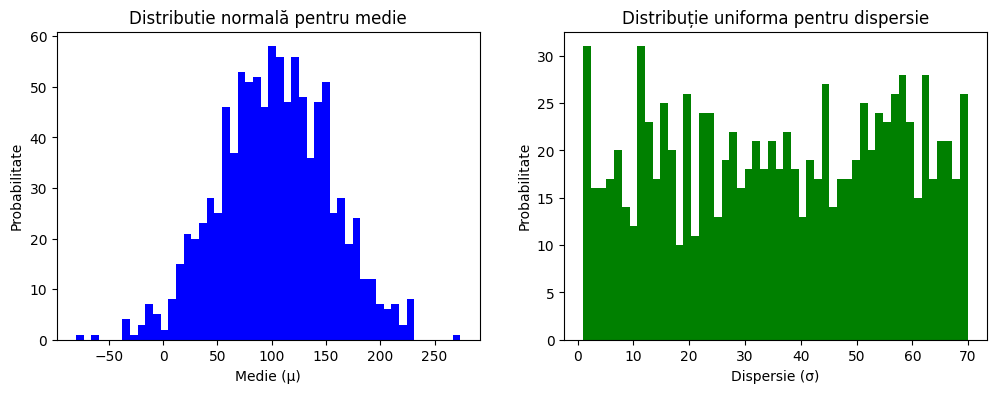

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(miu_samples, bins=50, color='blue')
plt.title('Distributie normală pentru medie')
plt.xlabel('Medie (μ)')
plt.ylabel('Probabilitate')

plt.subplot(1, 2, 2)
plt.hist(sigma_samples, bins=50, color='green')
plt.title('Distribuție uniforma pentru dispersie')
plt.xlabel('Dispersie (σ)')
plt.ylabel('Probabilitate')

plt.show()


**5.** Calculati probabilitatea a posteriori pentru datele experimentale utilizand probabilitatea a priori definita mai sus si verosimilitatea calculata anterior

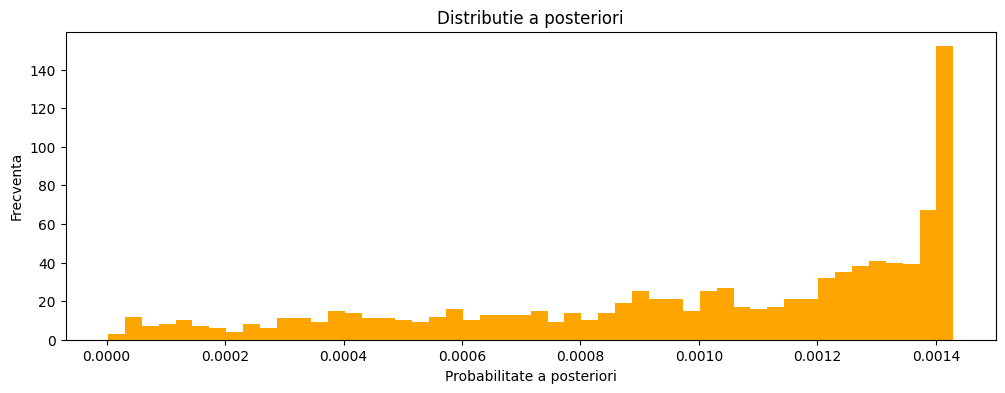

In [ ]:
prob_posteriori = []
#Calcul verosimilitate totala
veros_total = np.prod(veros_x)
for miu_sample, sigma_sample in zip(miu_samples, sigma_samples):
    # Calculul prob a priori
    prob_priori_miu = stats.norm.pdf(miu_sample, miu_mean, miu_std)
    prob_priori_sigma = 1 / (sigma_max - sigma_min)

    prob_posteriori.append((prob_priori_miu * prob_priori_sigma * veros_total))

# Normalizam
prob_posteriori = prob_posteriori / np.sum(prob_posteriori)

plt.figure(figsize=(12, 4))
plt.hist(prob_posteriori, bins=50, color='orange')
plt.title('Distributie a posteriori')
plt.xlabel('Probabilitate a posteriori')
plt.ylabel('Frecventa')
plt.show()

6. Calculati probabilitatea a posteriori pentru o serie de candidati si selectati-l pe cel cu probabilitatea cea mai mare. Utilizati urmatorul set de valori posibile: Care model este optim?

  miu=[70, 75, 80, 85, 90, 95, 100]

  sigma=[5, 10, 15, 20]

